In [1]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into train and test sets
from sklearn.model_selection import train_test_split

# to build a linear regression model
from sklearn.linear_model import LinearRegression

# to check a regression model's performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('insurance.csv')

In [8]:
data.shape

(1338, 7)

In [9]:
data['charges'].isnull().sum()

0

In [52]:
data['bmi_log'] = np.log(data['bmi'])
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_log
0,19,female,27.900,0,yes,southwest,16884.92400,3.328627
1,18,male,33.770,1,no,southeast,1725.55230,3.519573
2,28,male,33.000,3,no,southeast,4449.46200,3.496508
3,33,male,22.705,0,no,northwest,21984.47061,3.122585
4,32,male,28.880,0,no,northwest,3866.85520,3.363149


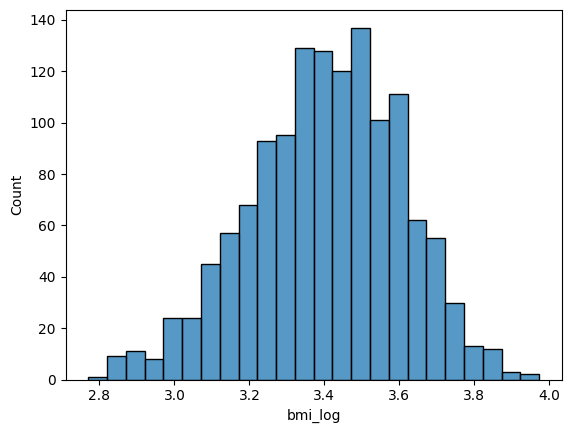

In [53]:
sns.histplot(data['bmi_log'])
plt.show()

In [54]:
data.groupby('region').median(['charges'])

,age,bmi,children,charges,bmi_log
region,,,,,
northeast,39.5,28.88,1.0,10057.652025,3.363149
northwest,39.0,28.88,1.0,8965.795750,3.363149
southeast,39.0,33.33,1.0,9294.131950,3.506458
southwest,39.0,30.30,1.0,8798.593000,3.411148


<Axes: >

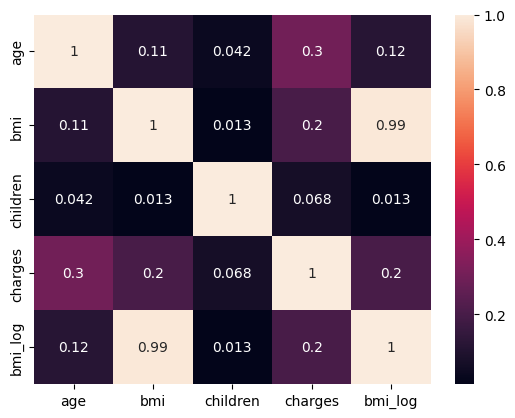

In [55]:
sns.heatmap(data.corr(numeric_only=True), annot=True)

In [56]:
data_with_dummy = pd.get_dummies(
    data,    # defining the dataframe from where to fetch the data
    columns=data.select_dtypes(include=["object", "category"]).columns.tolist(),    # defining the type of columns for which dummies will be made
    drop_first=True,    # dropping the first dummy column
)

data_with_dummy.head()

,age,bmi,children,charges,bmi_log,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,3.328627,0,1,0,0,1
1,18,33.770,1,1725.55230,3.519573,1,0,0,1,0
2,28,33.000,3,4449.46200,3.496508,1,0,0,1,0
3,33,22.705,0,21984.47061,3.122585,1,0,1,0,0
4,32,28.880,0,3866.85520,3.363149,1,0,1,0,0


In [57]:
data_with_dummy.drop(['bmi_log'], axis=1,inplace=True)
data_with_dummy.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [59]:
# defining the explanatory (independent) and response (dependent) variables
X = data_with_dummy.drop('charges', axis=1)
y = data_with_dummy['charges']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(
    X,    # specifying the independent variables
    y,    # specifying the dependent variable
    test_size=0.30,    # specifying the size of the test set as a fraction of the whole data
    random_state=42    # specifying a seed value to enable reproducible results
)

print(f'Train set: {x_train.shape}. Test set: {x_test.shape}')

Train set: (936, 8). Test set: (402, 8)


In [63]:
# fitting a linear model
lin_reg_model1 = LinearRegression()
lin_reg_model1.fit(x_train, y_train)

LinearRegression()

In [64]:
# printing the linear regression coefficients
print(
    "Coefficients:", lin_reg_model1.coef_, lin_reg_model1.intercept_
)

Coefficients: [  261.29692414   348.90691516   424.11912829   104.81182299
 23628.36722236  -486.93461047  -970.96883857  -926.32290791] -12373.96390303547


In [66]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

In [67]:
# Checking model performance on train set
print("Training Performance:")
lin_reg_model1_perf_train = model_performance_regression(
    lin_reg_model1, x_train, y_train
)
lin_reg_model1_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared
0,6142.519819,4251.255799,0.742398,0.740175
